In [1]:
import numpy as np
import pandas as pd
from arch import arch_model
from random import gauss
from random import seed
from matplotlib import pyplot as plt
import scipy.stats as sts

In [2]:
from rules_related import combine_rules_outputs
from whole_algorithm import train
from auxiliary import calc_log_returns

# Testing GARCH

## #1 increasing dispersion, increments are normal

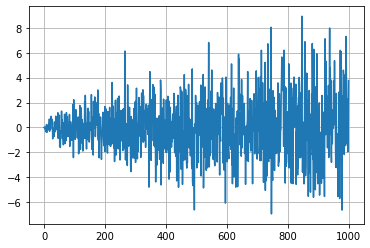

In [3]:
# create dataset
variance = np.arange(0, 10, .01)
# data = [gauss(0, var) for var in variance]
data = [sts.norm(0, var ** .5).rvs(1) for var in variance]

# plot
plt.plot(data)

plt.grid()
plt.show()

In [4]:
n_test = 100

train, test = data[:-n_test], data[-n_test:]

In [5]:
p = 1
q = 1

In [6]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [7]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 14641.619564208742
Iteration:      2,   Func. Count:     10,   Neg. LLF: 14641.736321631695
Iteration:      3,   Func. Count:     15,   Neg. LLF: 1888.9928764366573
Iteration:      4,   Func. Count:     20,   Neg. LLF: 14641.736321631695
Iteration:      5,   Func. Count:     25,   Neg. LLF: 14641.736321631695
Iteration:      6,   Func. Count:     30,   Neg. LLF: 14641.736321631695
Iteration:      7,   Func. Count:     35,   Neg. LLF: 14641.736321631695
Iteration:      8,   Func. Count:     39,   Neg. LLF: 1851.7230108101862
Inequality constraints incompatible    (Exit mode 4)
            Current function value: 1851.7230145712851
            Iterations: 8
            Function evaluations: 39
            Gradient evaluations: 8


/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [8]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1851.72
Distribution:                  Normal   AIC:                           3709.45
Method:            Maximum Likelihood   BIC:                           3723.85
                                        No. Observations:                  900
Date:                Sat, Oct 16 2021   Df Residuals:                      900
Time:                        16:09:42   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.

In [9]:
fitted.params

omega       0.039578
alpha[1]    0.043776
beta[1]     0.947732
Name: params, dtype: float64

In [10]:
forecast = fitted.forecast(reindex=False, horizon=n_test)

In [11]:
forecast.residual_variance.values[0]

array([10.15776703, 10.11108647, 10.06480232, 10.0189112 ,  9.97340979,
        9.92829477,  9.88356286,  9.8392108 ,  9.79523538,  9.75163339,
        9.70840166,  9.66553705,  9.62303644,  9.58089673,  9.53911488,
        9.49768782,  9.45661256,  9.41588611,  9.3755055 ,  9.33546779,
        9.29577008,  9.25640948,  9.21738312,  9.17868817,  9.14032181,
        9.10228125,  9.06456373,  9.0271665 ,  8.99008684,  8.95332206,
        8.91686947,  8.88072644,  8.84489033,  8.80935853,  8.77412847,
        8.73919757,  8.7045633 ,  8.67022314,  8.6361746 ,  8.60241519,
        8.56894245,  8.53575397,  8.50284731,  8.4702201 ,  8.43786995,
        8.40579451,  8.37399145,  8.34245846,  8.31119325,  8.28019353,
        8.24945706,  8.2189816 ,  8.18876493,  8.15880486,  8.1290992 ,
        8.0996458 ,  8.07044252,  8.04148722,  8.01277781,  7.98431219,
        7.95608831,  7.92810409,  7.90035751,  7.87284655,  7.84556921,
        7.81852351,  7.79170748,  7.76511916,  7.73875663,  7.71

In [12]:
forecast.variance.values[0]

array([10.15776703, 10.11108647, 10.06480232, 10.0189112 ,  9.97340979,
        9.92829477,  9.88356286,  9.8392108 ,  9.79523538,  9.75163339,
        9.70840166,  9.66553705,  9.62303644,  9.58089673,  9.53911488,
        9.49768782,  9.45661256,  9.41588611,  9.3755055 ,  9.33546779,
        9.29577008,  9.25640948,  9.21738312,  9.17868817,  9.14032181,
        9.10228125,  9.06456373,  9.0271665 ,  8.99008684,  8.95332206,
        8.91686947,  8.88072644,  8.84489033,  8.80935853,  8.77412847,
        8.73919757,  8.7045633 ,  8.67022314,  8.6361746 ,  8.60241519,
        8.56894245,  8.53575397,  8.50284731,  8.4702201 ,  8.43786995,
        8.40579451,  8.37399145,  8.34245846,  8.31119325,  8.28019353,
        8.24945706,  8.2189816 ,  8.18876493,  8.15880486,  8.1290992 ,
        8.0996458 ,  8.07044252,  8.04148722,  8.01277781,  7.98431219,
        7.95608831,  7.92810409,  7.90035751,  7.87284655,  7.84556921,
        7.81852351,  7.79170748,  7.76511916,  7.73875663,  7.71

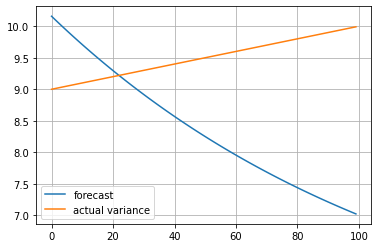

In [13]:
plt.plot(_, label='forecast')
plt.plot(variance[-n_test:], label='actual variance')

plt.legend()
plt.grid()
plt.show()

In [14]:
help(fitted.forecast)

Help on method forecast in module arch.univariate.base:

forecast(params: 'Optional[ArrayLike1D]' = None, horizon: 'int' = 1, start: 'Union[int, DateLike]' = None, align: "Literal['origin', 'target']" = 'origin', method: 'ForecastingMethod' = 'analytic', simulations: 'int' = 1000, rng: 'Optional[Callable[[Union[int, Tuple[int, ...]]], Float64Array]]' = None, random_state: 'Optional[np.random.RandomState]' = None, *, reindex: 'Optional[bool]' = None, x: 'Union[None, Dict[Label, ArrayLike], ArrayLike]' = None) -> 'ARCHModelForecast' method of arch.univariate.base.ARCHModelResult instance
    Construct forecasts from estimated model
    
    Parameters
    ----------
    params : ndarray, optional
        Alternative parameters to use.  If not provided, the parameters
        estimated when fitting the model are used.  Must be identical in
        shape to the parameters computed by fitting the model.
    horizon : int, optional
       Number of steps to forecast
    start : {int, datetim

## #2 white noise (Wiener process) 

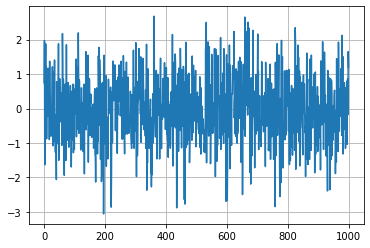

In [15]:
# create dataset
sample_size = 1000
mean = 0
variance = 1
# data = [sts.norm(0, var ** .5).rvs(1) for var in variance]
data = sts.norm(mean, variance ** .5).rvs(sample_size)

# plot
plt.plot(data)

plt.grid()
plt.show()

In [16]:
n_test = int(sample_size / 10)

train, test = data[:-n_test], data[-n_test:]

In [17]:
p = 1
q = 1

In [18]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [19]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4440.539756856046
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1240.466949373088
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1240.9687772517395
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1243.069742951654
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1237.2883998915595
Iteration:      6,   Func. Count:     34,   Neg. LLF: 1237.2836987724186
Iteration:      7,   Func. Count:     38,   Neg. LLF: 1237.2834237541954
Iteration:      8,   Func. Count:     42,   Neg. LLF: 1237.283414249186
Iteration:      9,   Func. Count:     45,   Neg. LLF: 1237.2834142503714
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1237.283414249186
            Iterations: 9
            Function evaluations: 45
            Gradient evaluations: 9


In [20]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1237.28
Distribution:                  Normal   AIC:                           2480.57
Method:            Maximum Likelihood   BIC:                           2494.97
                                        No. Observations:                  900
Date:                Sat, Oct 16 2021   Df Residuals:                      900
Time:                        16:09:42   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         

In [21]:
fitted.params

omega       0.123904
alpha[1]    0.039408
beta[1]     0.825351
Name: params, dtype: float64

In [22]:
forecast = fitted.forecast(reindex=False, horizon=n_test)

In [23]:
forecast_variance = forecast.variance.values[0]

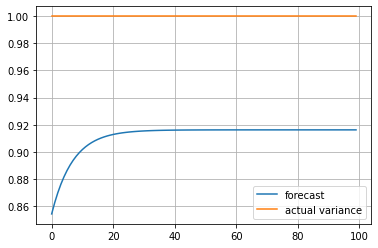

In [24]:
plt.plot(forecast_variance, label='forecast')
plt.plot([variance] * n_test, label='actual variance')

plt.legend()
plt.grid()
plt.show()

# Reading files

In [25]:
rtsi = pd.read_csv('files/RI.RTSI_790101_211016.csv', sep=',')

In [26]:
(rtsi['<TICKER>'] != 'RI.RTSI').any()

False

In [27]:
(rtsi['<TIME>'] != '00:00:00').any()

False

In [28]:
rtsi.drop(columns=['<PER>', '<TIME>', '<TICKER>'], inplace=True)

In [29]:
rtsi['<DATE>'] = pd.to_datetime(rtsi['<DATE>'], format='%Y%m%d')

In [30]:
rtsi.set_index('<DATE>', inplace=True)

In [31]:
rtsi['return'] = rtsi['<CLOSE>'].pct_change(1)

In [32]:
rtsi['log return'] = calc_log_returns(rtsi['<CLOSE>'])  # rtsi['<CLOSE>'].rolling(2).apply(lambda values: np.log(values[1] / values[0])).copy()

In [33]:
rtsi

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,return,log return
<DATE>,,,,,,,
2001-02-16,183.53,184.07,180.10,180.10,0,NaN,NaN
2001-02-18,180.10,180.10,180.10,180.10,0,0.000000,0.000000
2001-02-19,180.10,181.21,176.67,177.29,0,-0.015602,-0.015725
2001-02-20,177.29,179.90,175.28,176.45,0,-0.004738,-0.004749
2001-02-21,176.45,176.45,161.12,162.39,0,-0.079683,-0.083037
...,...,...,...,...,...,...,...
2021-10-11,1871.73,1883.71,1867.58,1882.43,1769145502,0.011537,0.011471
2021-10-12,1867.15,1876.79,1860.64,1869.94,1386130631,-0.006635,-0.006657
2021-10-13,1869.05,1869.05,1835.80,1855.11,1830447018,-0.007931,-0.007962


# Testing `train`

In [34]:
train()

TypeError: 'numpy.ndarray' object is not callable